# Basic Data Tools: Pandas

## Basics

The Pandas package introduces a very powerful data structure for working with labeled data in python: Dataframe. Each column represents a different type of data. The columns are named, so we will know what each entry in a column signifies. Each row represents a different entry in the dataset.

At its core, pandas builds on top of numpy, so it is a bit slower than writing optimal code in numpy, but it is more convenient and appropriate for most use-cases. 

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
companies = ['Jane Street', 'Citadel', 'Two Sigma', 'Goldman Sachs', 'Morgan Stanley']
Employees = [1200,1400,1600,40500,68000]
company_type = ['Proprietary Trading', 'Hedge Fund', 'Hedge Fund', 'Investment Bank', 'Investment Bank']

initial_comp_df = pd.DataFrame({'Company': companies, 'Industry Type': company_type, 'Number of Employees': Employees})
initial_comp_df

In [ ]:
# Index by company instead of integers
comp_df = pd.DataFrame({'Industry Type':company_type,'Number of Employees':Employees}, index = companies)
comp_df

In [ ]:
# Another way to create the same DataFrame
comp_df = pd.DataFrame(list(zip(company_type,Employees)),columns = ['Industry Type','Number of Employees'], index = companies)
comp_df

Dataframes have similarities to both dictionaries and numpy nd-arrays. We can retrive a column from a dataframe by using its name, just as we used to retrive an item from dictionary using its key


In [ ]:
comp_df['Number of Employees'] 

In [ ]:
comp_df.shape #gives us rows and columns in dataframe

Just like we saw retriving columns by using its name, rows can also be accessed using **loc** method:-

In [ ]:
comp_df.loc['Two Sigma'] #displaying the row Two Sigma

In [ ]:
comp_df.loc['Two Sigma','Number of Employees'] #number of employees in two sigma retrived

In [ ]:
comp_df.loc['Two Sigma':'Morgan Stanley','Number of Employees'] #slicing a subsection

In [ ]:
comp_df.loc['Citadel':'Goldman Sachs','Industry Type'] #slicing a subsection

Adding a new row and column in dataframe is also quite simple and analogous to working with a dictionary. Similar is the case with dropping columns as well. Let us take a look at few examples:-

In [ ]:
comp_df['Attrition(in %)'] = [10,12,15,20,25] #an example of adding a column
comp_df

In [ ]:
comp_df.loc['JP Morgan',:] = ['Investment Bank',100000,20] #adding a row
comp_df

In [ ]:
comp_df.drop('Attrition(in %)',axis = 1, inplace = True) #dropping a column
comp_df

In [ ]:
comp_df.sort_values(['Number of Employees'], ascending = False) #sorting a column

## Operations on DataFrames using Yahoo Finance Data 

We will use a custom package to get data from **yahoo finance** to get stock prices of a few companies and then will learn about some dataframe operations and applying functions to it 

In [86]:
import yfinance as yf

In [87]:

# download dataframe
FAANG_data = yf.download("META AAPL GOOG MSFT AMZN NFLX NVDA", start="2023-08-30", end="2024-08-30")
#generally when we have a very large data, to get a feel for a data we generally display first few entries in dataframe

FAANG_data.head()

[*********************100%***********************]  7 of 7 completed


Price                       Adj Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Date                                                                        
2023-08-30 00:00:00+00:00  186.694672  135.070007  136.594543  294.494843   
2023-08-31 00:00:00+00:00  186.913528  138.009995  137.013519  295.283234   
2023-09-01 00:00:00+00:00  188.495453  138.119995  136.464859  295.772217   
2023-09-05 00:00:00+00:00  188.734222  137.270004  136.375092  299.534485   
2023-09-06 00:00:00+00:00  181.978806  135.360001  135.038361  298.556488   

Price                                                              Close  \
Ticker                           MSFT        NFLX       NVDA        AAPL   
Date                                                                       
2023-08-30 00:00:00+00:00  326.340485  434.670013  49.249252  187.649994   
2023-08-31 00:00:00+00:00  325.318176  433.679993  49.340225  187.869995   
2023-09-01 00:00:00+00:00  326.211456  439.880005  48.494484  189.460007   
2023-09-05 00:00:00+00:00  331.065002  448.679993  48.533470  189.699997   
2023-09-06 00:00:00+00:00  330.399994  445.760010  47.050793  182.910004   

Price                                              ...        Open  \
Ticker                           AMZN        GOOG  ...        MSFT   
Date                                               ...               
2023-08-30 00:00:00+00:00  135.070007  136.929993  ...  328.670013   
2023-08-31 00:00:00+00:00  138.009995  137.350006  ...  329.200012   
2023-09-01 00:00:00+00:00  138.119995  136.800003  ...  331.309998   
2023-09-05 00:00:00+00:00  137.270004  136.710007  ...  329.000000   
2023-09-06 00:00:00+00:00  135.360001  135.369995  ...  333.380005   

Price                                               Volume            \
Ticker                           NFLX       NVDA      AAPL      AMZN   
Date                                                                   
2023-08-30 00:00:00+00:00  430.850006  49.043999  60813900  36137000   
2023-08-31 00:00:00+00:00  431.230011  49.380001  60794500  58781300   
2023-09-01 00:00:00+00:00  437.730011  49.762001  45732600  40948300   
2023-09-05 00:00:00+00:00  438.390015  48.223000  45280000  40636700   
2023-09-06 00:00:00+00:00  448.609985  48.441002  81755800  41785500   

Price                                                                        
Ticker                         GOOG      META      MSFT     NFLX       NVDA  
Date                                                                         
2023-08-30 00:00:00+00:00  21773400  17717000  15222100  3625400  735206000  
2023-08-31 00:00:00+00:00  28147900  17229900  26411000  3803000  528570000  
2023-09-01 00:00:00+00:00  16665700  12819800  14931200  4792100  463830000  
2023-09-05 00:00:00+00:00  17730200  14956000  18553900  6155900  382653000  
2023-09-06 00:00:00+00:00  15814300  15418100  17535800  3862300  468670000  

[5 rows x 42 columns]

In [88]:
FAANG_data = FAANG_data.Close #getting closing prices for each of the stock
FAANG_data.head()

Ticker,AAPL,AMZN,GOOG,META,MSFT,NFLX,NVDA
Date,,,,,,,
2023-08-30 00:00:00+00:00,187.649994,135.070007,136.929993,295.100006,328.790009,434.670013,49.264000
2023-08-31 00:00:00+00:00,187.869995,138.009995,137.350006,295.890015,327.760010,433.679993,49.355000
2023-09-01 00:00:00+00:00,189.460007,138.119995,136.800003,296.380005,328.660004,439.880005,48.508999
2023-09-05 00:00:00+00:00,189.699997,137.270004,136.710007,300.149994,333.549988,448.679993,48.548000
2023-09-06 00:00:00+00:00,182.910004,135.360001,135.369995,299.170013,332.880005,445.760010,47.061001


<Axes: xlabel='Date'>

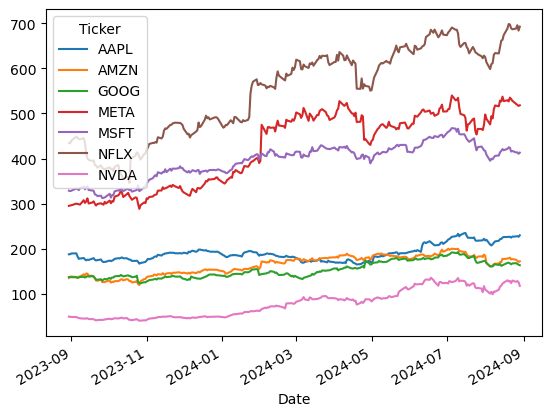

In [89]:
FAANG_data.plot(use_index='True') #plot of stock prices

### Filter, Plot and Apply

One of the important functionalities in Pandas in filtering dataframes. Often we want to work with a subset of data, based on some criteria. Let us take a look at few examples:-

In [90]:
print(FAANG_data.shape) 
FAANG_data_filtered = FAANG_data[(FAANG_data['AMZN'] < 190) & (FAANG_data['GOOG'] < 250)]
print(FAANG_data_filtered.shape)

(252, 7)
(238, 7)


Normally in python, we use **and**, **or** while writing programs. In Pandas, we will have to use bitwise operations which are as follows:-

& - and <br>
or - | <br>
not - ~ <br>

In [91]:
FAANG_data_filtered.tail()

Ticker,AAPL,AMZN,GOOG,META,MSFT,NFLX,NVDA
Date,,,,,,,
2024-08-23 00:00:00+00:00,226.839996,177.039993,167.429993,528.000000,416.790009,686.729980,129.369995
2024-08-26 00:00:00+00:00,227.179993,175.500000,167.929993,521.119995,413.489990,688.440002,126.459999
2024-08-27 00:00:00+00:00,228.029999,173.119995,166.380005,519.099976,413.839996,695.719971,128.300003
2024-08-28 00:00:00+00:00,226.490005,170.800003,164.500000,516.780029,410.600006,683.840027,125.610001
2024-08-29 00:00:00+00:00,229.789993,172.119995,163.399994,518.219971,413.119995,692.479980,117.589996


In [92]:
comp_df[comp_df['Industry Type'].str.contains('Hedge')] #filtering with strings

,Industry Type,Number of Employees
Citadel,Hedge Fund,1400
Two Sigma,Hedge Fund,1600


We can apply numpy mathematical functions to dataframes as well, which we will take a look:-

In [93]:
FAANG_data_log = np.log(FAANG_data) #applying log transformation to each of the values
FAANG_data_log.head()

Ticker,AAPL,AMZN,GOOG,META,MSFT,NFLX,NVDA
Date,,,,,,,
2023-08-30 00:00:00+00:00,5.234578,4.905793,4.919470,5.687314,5.795419,6.074587,3.897194
2023-08-31 00:00:00+00:00,5.235750,4.927326,4.922532,5.689988,5.792282,6.072307,3.899039
2023-09-01 00:00:00+00:00,5.244178,4.928123,4.918520,5.691642,5.795024,6.086502,3.881749
2023-09-05 00:00:00+00:00,5.245444,4.921950,4.917862,5.704282,5.809793,6.106310,3.882553
2023-09-06 00:00:00+00:00,5.208994,4.907938,4.908012,5.701012,5.807782,6.099781,3.851445


<Axes: xlabel='Date'>

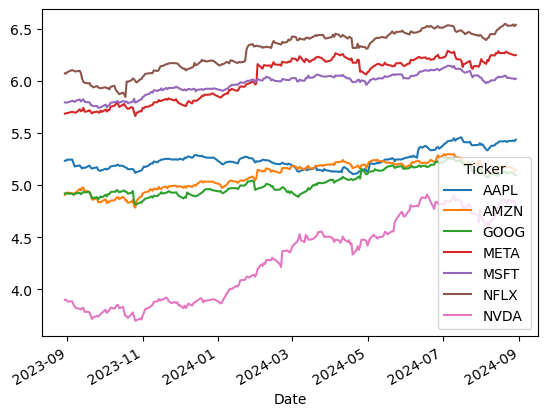

In [94]:
FAANG_data_log.plot() #plotting the log transformed data

In [95]:
FAANG_data_exp_NFLX = FAANG_data.copy()
FAANG_data_exp_NFLX['NFLX'] = np.log(FAANG_data_exp_NFLX['NFLX']) #applying transformation on a single column
FAANG_data_exp_NFLX.head()

Ticker,AAPL,AMZN,GOOG,META,MSFT,NFLX,NVDA
Date,,,,,,,
2023-08-30 00:00:00+00:00,187.649994,135.070007,136.929993,295.100006,328.790009,6.074587,49.264000
2023-08-31 00:00:00+00:00,187.869995,138.009995,137.350006,295.890015,327.760010,6.072307,49.355000
2023-09-01 00:00:00+00:00,189.460007,138.119995,136.800003,296.380005,328.660004,6.086502,48.508999
2023-09-05 00:00:00+00:00,189.699997,137.270004,136.710007,300.149994,333.549988,6.106310,48.548000
2023-09-06 00:00:00+00:00,182.910004,135.360001,135.369995,299.170013,332.880005,6.099781,47.061001


Often times, while doing data analysis...we would like to take a look at statistics of the numerical data such as its mean, median and if there are any null values in data. This is done by using describe function:-

In [96]:
FAANG_data.describe()

Ticker,AAPL,AMZN,GOOG,META,MSFT,NFLX,NVDA
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,190.382421,164.167818,152.888611,423.130159,394.274762,549.449564,78.709786
std,18.216606,21.114980,17.981910,83.711059,38.911607,99.909588,30.438985
min,165.000000,119.570000,123.400002,288.350006,312.140015,346.190002,40.326000
25%,175.677505,146.039997,138.047501,333.065010,370.702507,465.867500,48.160999
50%,186.870003,170.889999,147.180000,466.304993,406.119995,576.769989,79.102001
75%,195.750004,181.387501,168.749996,496.115005,421.415001,630.604980,104.375000
max,234.820007,200.000000,192.660004,539.909973,467.559998,698.539978,135.580002


In [97]:
#renaming columns
FAANG_data.columns = ['Apple','Amazon','Google','Meta','Microsoft', 'Netflix','NVIDIA']
FAANG_data.head()

,Apple,Amazon,Google,Meta,Microsoft,Netflix,NVIDIA
Date,,,,,,,
2023-08-30 00:00:00+00:00,187.649994,135.070007,136.929993,295.100006,328.790009,434.670013,49.264000
2023-08-31 00:00:00+00:00,187.869995,138.009995,137.350006,295.890015,327.760010,433.679993,49.355000
2023-09-01 00:00:00+00:00,189.460007,138.119995,136.800003,296.380005,328.660004,439.880005,48.508999
2023-09-05 00:00:00+00:00,189.699997,137.270004,136.710007,300.149994,333.549988,448.679993,48.548000
2023-09-06 00:00:00+00:00,182.910004,135.360001,135.369995,299.170013,332.880005,445.760010,47.061001


In [98]:
FAANG_data>2000 #how filtering works essentially

,Apple,Amazon,Google,Meta,Microsoft,Netflix,NVIDIA
Date,,,,,,,
2023-08-30 00:00:00+00:00,False,False,False,False,False,False,False
2023-08-31 00:00:00+00:00,False,False,False,False,False,False,False
2023-09-01 00:00:00+00:00,False,False,False,False,False,False,False
2023-09-05 00:00:00+00:00,False,False,False,False,False,False,False
2023-09-06 00:00:00+00:00,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2024-08-23 00:00:00+00:00,False,False,False,False,False,False,False
2024-08-26 00:00:00+00:00,False,False,False,False,False,False,False
2024-08-27 00:00:00+00:00,False,False,False,False,False,False,False


We can often use multiple filter operations followed by selections in a single command to performm our task, it becomes very convenient. Lets see an example:-

In [99]:
FAANG_data[FAANG_data.index<pd.to_datetime('2023-09-12', utc = True)][['Apple','Google']].tail()

,Apple,Google
Date,,
2023-09-05 00:00:00+00:00,189.699997,136.710007
2023-09-06 00:00:00+00:00,182.910004,135.369995
2023-09-07 00:00:00+00:00,177.559998,136.199997
2023-09-08 00:00:00+00:00,178.179993,137.199997
2023-09-11 00:00:00+00:00,179.360001,137.740005


We can use apply function to perform operations on rows. Its a pythonic way of doing it, instead of writing loops. Lets see a couple of examples:-

In [100]:
def high_price(x,y):
    if (x+y)//2>160:
        return 'Yes'
    else:
        return 'No'

In [101]:
FAANG_data.head()

,Apple,Amazon,Google,Meta,Microsoft,Netflix,NVIDIA
Date,,,,,,,
2023-08-30 00:00:00+00:00,187.649994,135.070007,136.929993,295.100006,328.790009,434.670013,49.264000
2023-08-31 00:00:00+00:00,187.869995,138.009995,137.350006,295.890015,327.760010,433.679993,49.355000
2023-09-01 00:00:00+00:00,189.460007,138.119995,136.800003,296.380005,328.660004,439.880005,48.508999
2023-09-05 00:00:00+00:00,189.699997,137.270004,136.710007,300.149994,333.549988,448.679993,48.548000
2023-09-06 00:00:00+00:00,182.910004,135.360001,135.369995,299.170013,332.880005,445.760010,47.061001


In [102]:
FAANG_data['High Stock Price'] = FAANG_data.apply(lambda x: high_price(x['Google'],x['Amazon']), axis = 1)
FAANG_data.head()

,Apple,Amazon,Google,Meta,Microsoft,Netflix,NVIDIA,High Stock Price
Date,,,,,,,,
2023-08-30 00:00:00+00:00,187.649994,135.070007,136.929993,295.100006,328.790009,434.670013,49.264000,No
2023-08-31 00:00:00+00:00,187.869995,138.009995,137.350006,295.890015,327.760010,433.679993,49.355000,No
2023-09-01 00:00:00+00:00,189.460007,138.119995,136.800003,296.380005,328.660004,439.880005,48.508999,No
2023-09-05 00:00:00+00:00,189.699997,137.270004,136.710007,300.149994,333.549988,448.679993,48.548000,No
2023-09-06 00:00:00+00:00,182.910004,135.360001,135.369995,299.170013,332.880005,445.760010,47.061001,No


In [103]:
FAANG_data[FAANG_data['High Stock Price'] == 'Yes'].head()

,Apple,Amazon,Google,Meta,Microsoft,Netflix,NVIDIA,High Stock Price
Date,,,,,,,,
2024-02-09 00:00:00+00:00,188.850006,174.449997,150.220001,468.109985,420.549988,561.320007,72.133003,Yes
2024-03-14 00:00:00+00:00,173.000000,178.750000,144.339996,491.829987,425.220001,613.010010,87.944000,Yes
2024-03-18 00:00:00+00:00,173.720001,174.479996,148.479996,496.980011,417.320007,618.390015,88.455002,Yes
2024-03-19 00:00:00+00:00,176.080002,175.899994,147.919998,496.239990,421.410004,620.739990,89.398003,Yes
2024-03-20 00:00:00+00:00,178.669998,178.149994,149.679993,505.519989,425.230011,627.690002,90.372002,Yes


### Missing Data and GroupBy

In [104]:
#just an example
FAANG_data['Linkedin'] = np.random.choice([240,239,241,np.nan], size = len(FAANG_data))
FAANG_data['Lyft'] = np.random.choice([300,296,298,np.nan], size = len(FAANG_data))
FAANG_data.head()

,Apple,Amazon,Google,Meta,Microsoft,Netflix,NVIDIA,High Stock Price,Linkedin,Lyft
Date,,,,,,,,,,
2023-08-30 00:00:00+00:00,187.649994,135.070007,136.929993,295.100006,328.790009,434.670013,49.264000,No,NaN,298.0
2023-08-31 00:00:00+00:00,187.869995,138.009995,137.350006,295.890015,327.760010,433.679993,49.355000,No,239.0,300.0
2023-09-01 00:00:00+00:00,189.460007,138.119995,136.800003,296.380005,328.660004,439.880005,48.508999,No,239.0,298.0
2023-09-05 00:00:00+00:00,189.699997,137.270004,136.710007,300.149994,333.549988,448.679993,48.548000,No,NaN,298.0
2023-09-06 00:00:00+00:00,182.910004,135.360001,135.369995,299.170013,332.880005,445.760010,47.061001,No,240.0,296.0


In [105]:
#dropping null values
FAANG_data.dropna().head()

,Apple,Amazon,Google,Meta,Microsoft,Netflix,NVIDIA,High Stock Price,Linkedin,Lyft
Date,,,,,,,,,,
2023-08-31 00:00:00+00:00,187.869995,138.009995,137.350006,295.890015,327.760010,433.679993,49.355000,No,239.0,300.0
2023-09-01 00:00:00+00:00,189.460007,138.119995,136.800003,296.380005,328.660004,439.880005,48.508999,No,239.0,298.0
2023-09-06 00:00:00+00:00,182.910004,135.360001,135.369995,299.170013,332.880005,445.760010,47.061001,No,240.0,296.0
2023-09-08 00:00:00+00:00,178.179993,138.229996,137.199997,297.890015,334.269989,442.799988,45.571999,No,239.0,300.0
2023-09-11 00:00:00+00:00,179.360001,143.100006,137.740005,307.559998,337.940002,445.359985,45.178001,No,241.0,300.0


In [106]:
#imputing null values with mean and median
FAANG_data['Linkedin'] = FAANG_data['Linkedin'].fillna(value = FAANG_data['Linkedin'].mean())
FAANG_data['Lyft'] = FAANG_data['Lyft'].fillna(value = FAANG_data['Lyft'].median())
FAANG_data.head()

,Apple,Amazon,Google,Meta,Microsoft,Netflix,NVIDIA,High Stock Price,Linkedin,Lyft
Date,,,,,,,,,,
2023-08-30 00:00:00+00:00,187.649994,135.070007,136.929993,295.100006,328.790009,434.670013,49.264000,No,240.043011,298.0
2023-08-31 00:00:00+00:00,187.869995,138.009995,137.350006,295.890015,327.760010,433.679993,49.355000,No,239.000000,300.0
2023-09-01 00:00:00+00:00,189.460007,138.119995,136.800003,296.380005,328.660004,439.880005,48.508999,No,239.000000,298.0
2023-09-05 00:00:00+00:00,189.699997,137.270004,136.710007,300.149994,333.549988,448.679993,48.548000,No,240.043011,298.0
2023-09-06 00:00:00+00:00,182.910004,135.360001,135.369995,299.170013,332.880005,445.760010,47.061001,No,240.000000,296.0


Let us take a look at the **group by** operation. Groupby allows us to group together rows based off a column and perform an aggregate function on them( count, max, mean etc)

In [107]:
comp_df.groupby('Industry Type').mean() #average number of employees in each industry type

,Number of Employees
Industry Type,
Hedge Fund,1500.0
Investment Bank,54250.0
Proprietary Trading,1200.0


In [108]:
comp_df.groupby('Industry Type').sum() #sum of employees in each industry type

,Number of Employees
Industry Type,
Hedge Fund,3000
Investment Bank,108500
Proprietary Trading,1200


In [109]:
comp_df['Industry Type'].value_counts() #This operation is really helpful to know if there are any duplicate entries or count of each entry

Industry Type
Hedge Fund             2
Investment Bank        2
Proprietary Trading    1
Name: count, dtype: int64

Now, let us apply the **groupby** operation on FAANG_data, which we downloaded from yahoo finance, to calculate average monthly return on stock price of FAANG companies.

In [110]:
FAANG_data['Avg FAANG Stock Price'] = FAANG_data.iloc[:,0:7].mean(axis = 1) #calculating avg stock price in a column

In [111]:
FAANG_data.head()

,Apple,Amazon,Google,Meta,Microsoft,Netflix,NVIDIA,High Stock Price,Linkedin,Lyft,Avg FAANG Stock Price
Date,,,,,,,,,,,
2023-08-30 00:00:00+00:00,187.649994,135.070007,136.929993,295.100006,328.790009,434.670013,49.264000,No,240.043011,298.0,223.924860
2023-08-31 00:00:00+00:00,187.869995,138.009995,137.350006,295.890015,327.760010,433.679993,49.355000,No,239.000000,300.0,224.273573
2023-09-01 00:00:00+00:00,189.460007,138.119995,136.800003,296.380005,328.660004,439.880005,48.508999,No,239.000000,298.0,225.401288
2023-09-05 00:00:00+00:00,189.699997,137.270004,136.710007,300.149994,333.549988,448.679993,48.548000,No,240.043011,298.0,227.801140
2023-09-06 00:00:00+00:00,182.910004,135.360001,135.369995,299.170013,332.880005,445.760010,47.061001,No,240.000000,296.0,225.501575


In [112]:
Avg_FAANG_stockprice_data = FAANG_data[['Avg FAANG Stock Price']] #selecting columns in dataframe
Avg_FAANG_stockprice_data.reset_index(inplace = True) #resetting index so that we can calculate monthly returns
Avg_FAANG_stockprice_data['Mdate'] = Avg_FAANG_stockprice_data['Date'].dt.to_period('M')
Avg_FAANG_stockprice_data.head()

,Date,Avg FAANG Stock Price,Mdate
0,2023-08-30 00:00:00+00:00,223.924860,2023-08
1,2023-08-31 00:00:00+00:00,224.273573,2023-08
2,2023-09-01 00:00:00+00:00,225.401288,2023-09
3,2023-09-05 00:00:00+00:00,227.801140,2023-09
4,2023-09-06 00:00:00+00:00,225.501575,2023-09


## Finance Examples

### Monthly Returns

Let us understand how to calculate monthly returns from daily returns of a stock, as it will help us later

Let $P_{0}$ be the initial stock price, and after a month the stock price becomes $P_{1}$, and $r_{0}$ be the monthly percentage return:-

\begin{equation}
P_{1} = P_{0}(1+r_{0})
\end{equation}

Let $r_1$, $r_2$, $\ldots$, $r_{30}$ be the the daily returns of the stock in a month. Then we can write:-
    
\begin{equation}
P_{1} = P_{0}(1+r_{1})(1+r_{2})\ldots(1+r_{30})
\end{equation}

From both the above equations we can say that:-
    
$1+r_{0} = (1+r_{1})(1+r_{2})\ldots(1+r_{30})$ <br>
$r_{0} = (1+r_{1})(1+r_{2})\ldots(1+r_{30}) - 1$

Therefore, to calculate monthly return we will calculate daily return first:-



In [113]:
Avg_FAANG_stockprice_data['daily_return'] = Avg_FAANG_stockprice_data['Avg FAANG Stock Price'].pct_change()
Avg_FAANG_stockprice_data['daily_return_adjusted'] = 1 + Avg_FAANG_stockprice_data['daily_return']
Avg_FAANG_stockprice_data.head()

,Date,Avg FAANG Stock Price,Mdate,daily_return,daily_return_adjusted
0,2023-08-30 00:00:00+00:00,223.924860,2023-08,NaN,NaN
1,2023-08-31 00:00:00+00:00,224.273573,2023-08,0.001557,1.001557
2,2023-09-01 00:00:00+00:00,225.401288,2023-09,0.005028,1.005028
3,2023-09-05 00:00:00+00:00,227.801140,2023-09,0.010647,1.010647
4,2023-09-06 00:00:00+00:00,225.501575,2023-09,-0.010095,0.989905


Now we have to calculate monthly returns. It is evident that we will have to **groupby** using monthly date:-

In [114]:
Avg_FAANG_stockprice_data['Monthly Return'] = Avg_FAANG_stockprice_data.groupby('Mdate')['daily_return_adjusted'].transform(np.prod) - 1
Avg_FAANG_stockprice_data.head()

,Date,Avg FAANG Stock Price,Mdate,daily_return,daily_return_adjusted,Monthly Return
0,2023-08-30 00:00:00+00:00,223.924860,2023-08,NaN,NaN,0.001557
1,2023-08-31 00:00:00+00:00,224.273573,2023-08,0.001557,1.001557,0.001557
2,2023-09-01 00:00:00+00:00,225.401288,2023-09,0.005028,1.005028,-0.065402
3,2023-09-05 00:00:00+00:00,227.801140,2023-09,0.010647,1.010647,-0.065402
4,2023-09-06 00:00:00+00:00,225.501575,2023-09,-0.010095,0.989905,-0.065402


In [115]:
Avg_FAANG_stockprice_data[['Mdate','Monthly Return']].drop_duplicates().head() #dropping duplicates to see returns for each monthy

,Mdate,Monthly Return
0,2023-08,0.001557
2,2023-09,-0.065402
22,2023-10,0.036648
44,2023-11,0.115548
65,2023-12,0.032439


### The rolling() method and the MACD Trading Strategy

In [116]:
import matplotlib.pyplot as plt
# %matplotlib notebook

Let us take a look at Apple stock price data:-

In [117]:
Apple_data = FAANG_data[['Apple']]
Apple_data.head()

,Apple
Date,
2023-08-30 00:00:00+00:00,187.649994
2023-08-31 00:00:00+00:00,187.869995
2023-09-01 00:00:00+00:00,189.460007
2023-09-05 00:00:00+00:00,189.699997
2023-09-06 00:00:00+00:00,182.910004


 **Rolling** function provides the feature of rolling window calculations. We take a window of a desired size, and perform some mathematical operations on it. A common example is moving average which is often used in trading and time series forecasting

In [118]:
Apple_data.rolling(3).mean()

,Apple
Date,
2023-08-30 00:00:00+00:00,NaN
2023-08-31 00:00:00+00:00,NaN
2023-09-01 00:00:00+00:00,188.326665
2023-09-05 00:00:00+00:00,189.010000
2023-09-06 00:00:00+00:00,187.356669
...,...
2024-08-23 00:00:00+00:00,225.923330
2024-08-26 00:00:00+00:00,226.183329
2024-08-27 00:00:00+00:00,227.349996


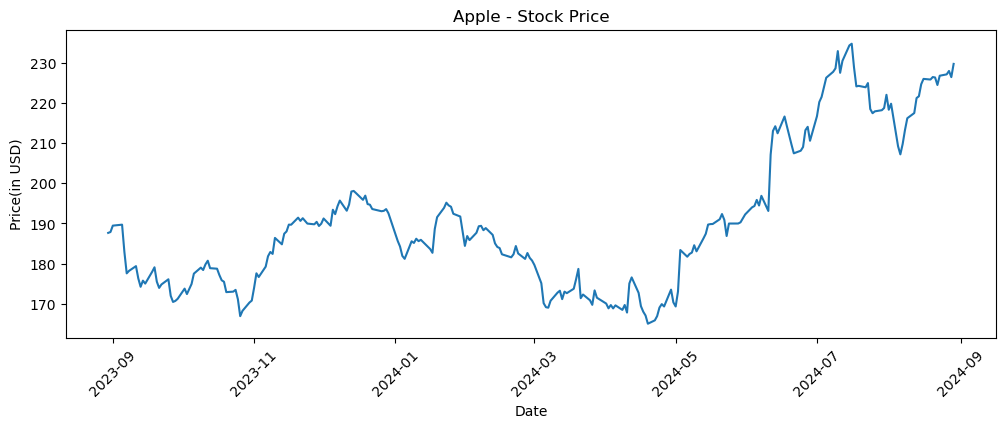

In [119]:
plt.figure(figsize = (12,4))
plt.plot(Apple_data)
plt.xticks(rotation = 45)
plt.title('Apple - Stock Price')
plt.xlabel('Date')
plt.ylabel('Price(in USD)')
plt.show()

**MACD** stands for Moving Average convergence/Divergence. It is a momentum indicator, that is it tells the general direction of stock in short to medium term.

A few principles of MACD trading strategy:-

We will calculate some exponential moving averages with window size 12 and 26. 

MACD line gives us the short to medium term trend of the price action(whether stock is going up, down, sideways)

Signal line is 9 month exponential moving average of MACD line, so its just smoothened version of MACD line. 

In [120]:
#Calculate short term exponential moving average
ShortEMA = Apple_data.ewm(span = 12, adjust = False).mean()

#Calculate long term exponential moving average
LongEMA = Apple_data.ewm(span = 26, adjust = False).mean()

#MACD line
MACD = ShortEMA - LongEMA
Apple_data['MACD'] = MACD

#Signal Line
signal = MACD.ewm(span = 9, adjust = False).mean()
Apple_data['Signal'] = signal

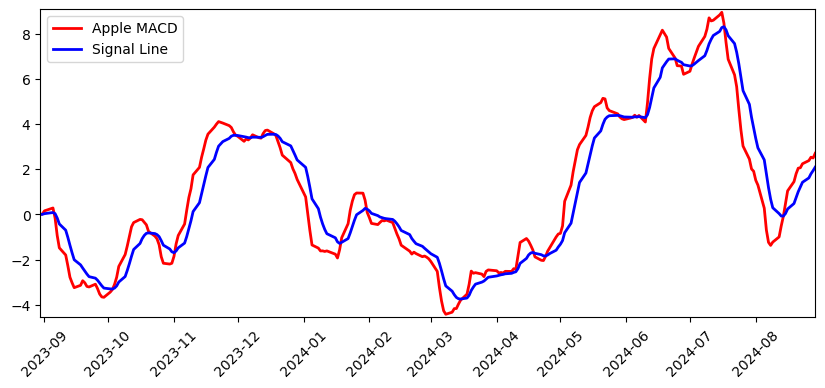

In [121]:
plt.figure(figsize = (10,4))
plt.plot(Apple_data.index,MACD,label = 'Apple MACD',color = 'red', linewidth = 2)
plt.plot(Apple_data.index,signal,label = 'Signal Line', color = 'blue', linewidth = 2)
plt.xticks(rotation = 45)
plt.legend()
plt.margins(x=0, y=0.01)
plt.show()

**MACD** trading strategy can be used as a buy or sell signal:-

**Buy** when **MACD line** crosses above the **Signal Line** <br>
**Sell** when **MACD line** crosses below the **Signal Line**


**Pandas is the bread and butter of data analysis when it comes to tabular data. Play with it functionalities on your own to get a hang of it. We will be using operations like filter, null value imputation a lot in data cleaning**
